In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split

from sklearn import metrics

#### Logistic Regression

Logistic Regression is a discriminative classifier, which makes predictions based on whether an observation falls into one of two categories of a binary dependent variable. From logistic regression, we can describe the relationship between the dependent variable outcome and the multiple ordinal independent variables.

In [2]:
"LOGISTIC REGRESSION"
def logReg(xTrain, yTrain):
    # from sklearn document on LogisticRegression
    clf = LogisticRegression(random_state=0).fit(xTrain, yTrain) 
    return clf

### Running and Assessing Models on Continuous Data 

Rather than having categorical data, we see how logistic regression performs using continous features. 

In [3]:
dir = "../../data/processed/week03_nobin.csv"
df = pd.read_csv(dir)
df.head()

,ustat,alph1,alph2,beta,chi
0,8.408213,2.344511,2.344511,60.0,0
1,7.006844,2.344511,2.344511,60.0,0
2,5.255133,2.344511,2.344511,60.0,0
3,3.503422,2.344511,2.344511,60.0,0
4,2.102053,2.344511,2.344511,60.0,0


#### Splitting the data into training and testing. We will use train_test_split from Scikit Learn with a ratio of 67:33. 

In [4]:
# separating features and targets

y = df['chi']
x = df.drop(['chi'], axis=1)

In [5]:
# Train test split, ratio is 67:33
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33, random_state=42)

In [6]:
lr = logReg(xTrain, yTrain)

In [7]:
print("Logistic Regression train set score: ", accuracy_score(yTrain, lr.predict(xTrain)))
tn, fp, fn, tp = confusion_matrix(yTrain, lr.predict(xTrain)).ravel()
print("Confusion Matrix Results: ", tn, fp, fn, tp)

Logistic Regression train set score:  0.9471947194719472
Confusion Matrix Results:  273 5 11 14


In [8]:
print("Logistic Regression test set score: ", accuracy_score(yTest, lr.predict(xTest)))
tn, fp, fn, tp = confusion_matrix(yTest, lr.predict(xTest)).ravel()
print("Confusion Matrix Results: ", tn, fp, fn, tp)


Logistic Regression test set score:  0.9108910891089109
Confusion Matrix Results:  87 1 8 5


C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Logistic Regression')

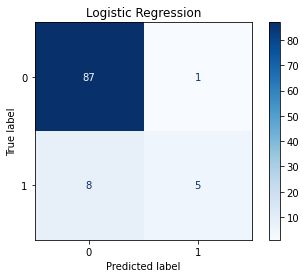

In [9]:
disp = plot_confusion_matrix(lr, xTest, yTest, cmap=plt.cm.Blues)
disp.ax_.set_title("Logistic Regression")


C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


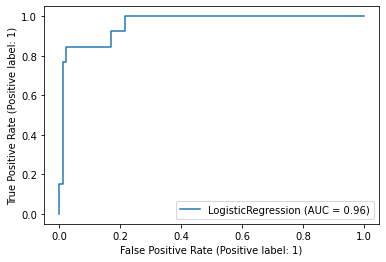

In [10]:
metrics.plot_roc_curve(lr, xTest, yTest)

The results are pretty good with high training accuracy of 0.95 and testing accuracy of 0.92. The area under the curve score is high with a score of 0.95. The confusion matrix shows that the model does attempt to identify both groups, with a good True Negative (small chi) and True Positive (large chi). 

However, because the scores are so high. I suspect that our results may be the outcome of overfitting and/or highly unbalanced, small dataset.

### Adding a new feature: diff = the difference between alph1 and alph2.

In [11]:
dir = "../../data/processed/week03_nobin_diff.csv"
df = pd.read_csv(dir)
df.head()

,ustat,alph1,alph2,beta,chi,diff
0,8.408213,2.344511,2.344511,60.0,0,0.0
1,7.006844,2.344511,2.344511,60.0,0,0.0
2,5.255133,2.344511,2.344511,60.0,0,0.0
3,3.503422,2.344511,2.344511,60.0,0,0.0
4,2.102053,2.344511,2.344511,60.0,0,0.0


In [12]:
# separating features and targets

y = df['chi']
x = df.drop(['chi'], axis=1)

In [13]:
# Train test split, ratio is 66:33
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33, random_state=42)

#### Logistic Regression

In [14]:
"LOGISTIC REGRESSION"
def logReg(xTrain, yTrain):
    # from sklearn document on LogisticRegression
    clf = LogisticRegression(random_state=0).fit(xTrain, yTrain) 
    return clf


In [15]:
lr = logReg(xTrain, yTrain)

In [16]:
print("Logistic Regression train set score: ", accuracy_score(yTrain, lr.predict(xTrain)))
tn, fp, fn, tp = confusion_matrix(yTrain, lr.predict(xTrain)).ravel()
print("Confusion Matrix Results: ", tn, fp, fn, tp)

Logistic Regression train set score:  0.9518518518518518
Confusion Matrix Results:  244 3 10 13


In [17]:
print("Logistic Regression test set score: ", accuracy_score(yTest, lr.predict(xTest)))
tn, fp, fn, tp = confusion_matrix(yTest, lr.predict(xTest)).ravel()
print("Confusion Matrix Results: ", tn, fp, fn, tp)


Logistic Regression test set score:  0.9253731343283582
Confusion Matrix Results:  116 3 7 8


C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Logistic Regression')

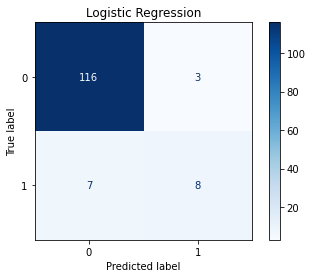

In [18]:
disp = plot_confusion_matrix(lr, xTest, yTest, cmap=plt.cm.Blues)
disp.ax_.set_title("Logistic Regression")


C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


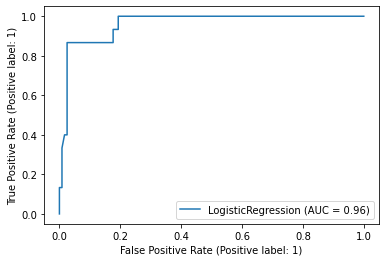

In [19]:
metrics.plot_roc_curve(lr, xTest, yTest)

Alph1 and Alph2 might be redundant if we include diff. Let's remove them and see what happens.

In [20]:
x = df.drop(['alph1', 'alph2'], axis=1)
x

,ustat,beta,chi,diff
0,8.408213,60.0,0,0.000000
1,7.006844,60.0,0,0.000000
2,5.255133,60.0,0,0.000000
3,3.503422,60.0,0,0.000000
4,2.102053,60.0,0,0.000000
...,...,...,...,...
399,7.524804,19.0,1,0.000000
400,7.021232,46.8,1,0.131148
401,5.265924,46.8,1,0.131148
402,8.632662,46.6,1,4.670833


In [21]:
# Train test split, ratio is 66:33
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33, random_state=42)

In [22]:
lr = logReg(xTrain, yTrain)

In [23]:
print("Logistic Regression train set score: ", accuracy_score(yTrain, lr.predict(xTrain)))
tn, fp, fn, tp = confusion_matrix(yTrain, lr.predict(xTrain)).ravel()
print("Confusion Matrix Results: ", tn, fp, fn, tp)

Logistic Regression train set score:  0.9925925925925926
Confusion Matrix Results:  247 0 2 21


In [24]:
print("Logistic Regression test set score: ", accuracy_score(yTest, lr.predict(xTest)))
tn, fp, fn, tp = confusion_matrix(yTest, lr.predict(xTest)).ravel()
print("Confusion Matrix Results: ", tn, fp, fn, tp)

Logistic Regression test set score:  1.0
Confusion Matrix Results:  119 0 0 15


C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Logistic Regression')

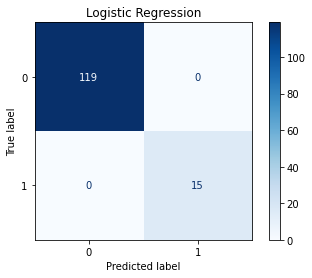

In [25]:
disp = plot_confusion_matrix(lr, xTest, yTest, cmap=plt.cm.Blues)
disp.ax_.set_title("Logistic Regression")

C:\Users\jeffr\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


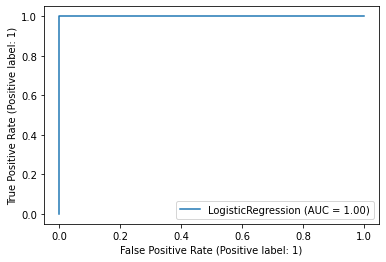

In [26]:
metrics.plot_roc_curve(lr, xTest, yTest)

Made it worse. Need to find a way to overcome overfitting.